In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_auc_score ,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

In [3]:
dataset = pd.read_csv("/content/creditcard.csv")

In [4]:
dataset.shape

(11959, 31)

In [5]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

In [8]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,...,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000
mean,8009.996822,-0.216230,0.277097,0.889505,0.282606,-0.086585,0.139986,-0.121943,-0.048727,0.911579,...,-0.061474,-0.153850,-0.033709,0.017113,0.104794,0.062891,0.008320,0.000271,62.352617,0.004349
std,6204.332248,1.583914,1.308884,1.331824,1.478162,1.191776,1.306285,1.153899,1.246823,1.192349,...,0.918705,0.626631,0.505355,0.591394,0.429413,0.561603,0.405100,0.261230,178.247010,0.065803
min,0.000000,-27.670569,-34.607649,-22.804686,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2542.000000,-0.978944,-0.261503,0.417186,-0.622456,-0.688114,-0.622521,-0.591335,-0.185243,0.196741,...,-0.268151,-0.543613,-0.171833,-0.333251,-0.144092,-0.353864,-0.080064,-0.015461,5.000000,0.000000
50%,6662.000000,-0.340742,0.256346,0.951223,0.213029,-0.183847,-0.146903,-0.094876,0.013616,0.894911,...,-0.130062,-0.124900,-0.044299,0.072099,0.143136,0.001972,-0.003039,0.015452,15.950000,0.000000
75%,12382.000000,1.161273,0.883626,1.613678,1.159141,0.346298,0.508432,0.431657,0.267560,1.589120,...,0.021687,0.234029,0.075686,0.401798,0.380076,0.409231,0.106344,0.073171,50.000000,0.000000
max,20642.000000,1.960497,9.092123,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


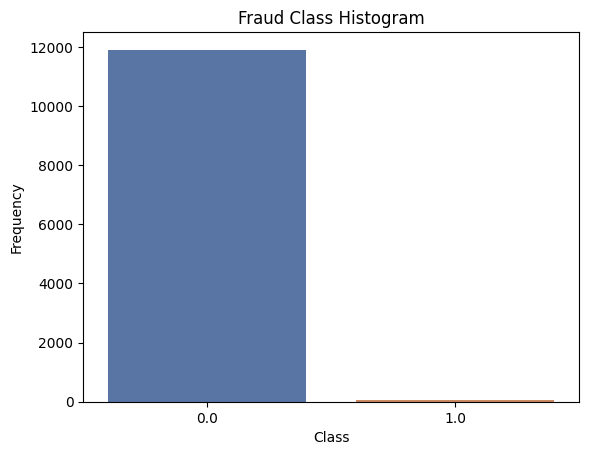

In [9]:
sns.countplot(x="Class", data=dataset, palette="deep")
plt.title("Fraud Class Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

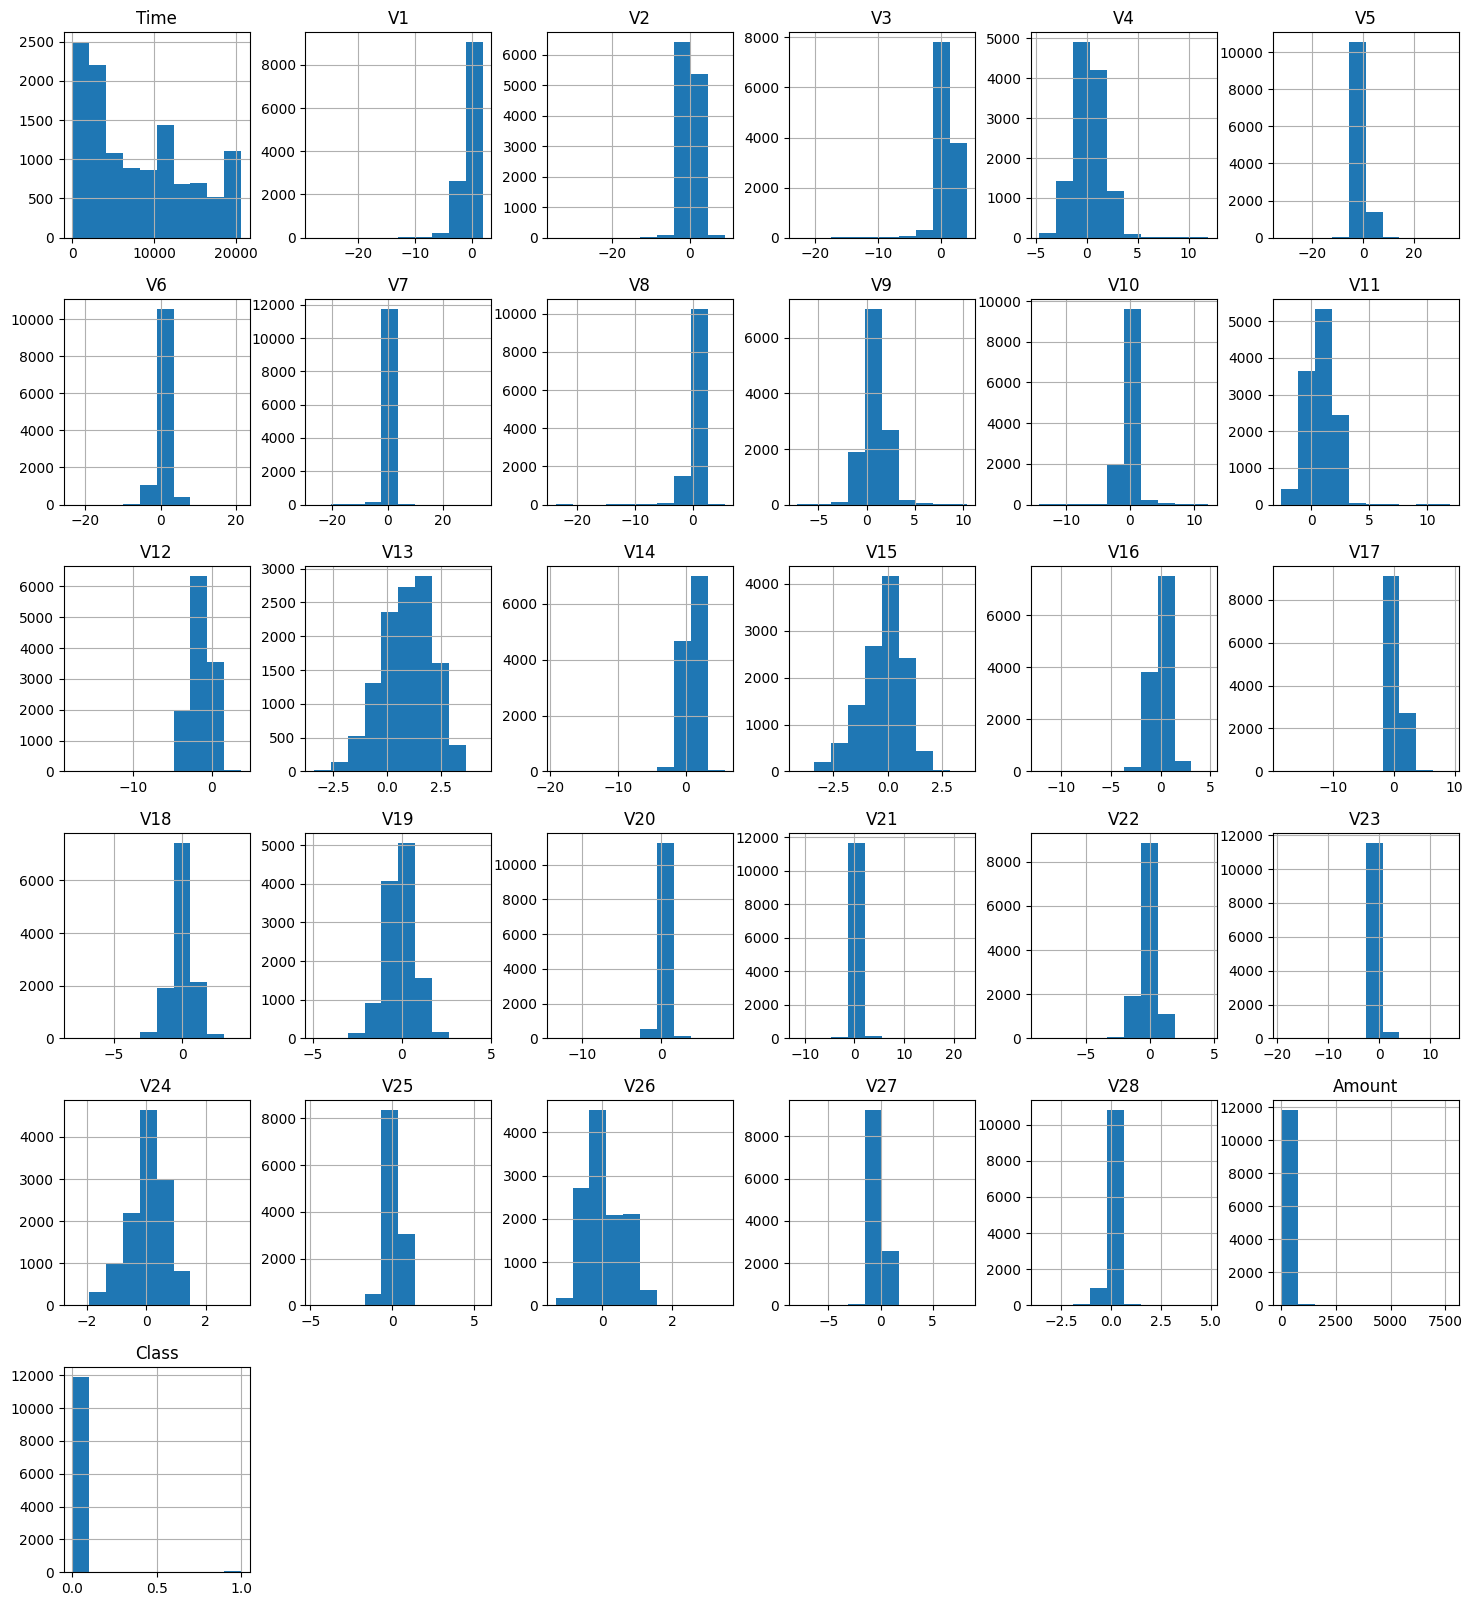

In [10]:
dataset.hist(figsize=(18,20))

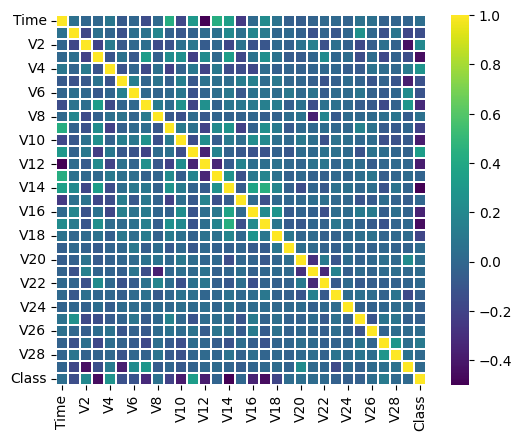

In [11]:
# fig = plt.figure(figsize = (20, 13))
sns.heatmap(dataset.corr(), cmap='viridis', vmax = 1, vmin=-0.5 , square = True , linewidths= 0.05)
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

stc = StandardScaler()

dataset['scaled_amount'] = stc.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['scaled_time'] = stc.fit_transform(dataset['Time'].values.reshape(-1,1))

dataset.drop(['Amount' , 'Time'] , axis = 1 , inplace = True )

scaled_amount = dataset['scaled_amount']
scaled_time   = dataset['scaled_time']

dataset.drop(['scaled_amount' , 'scaled_time'] , axis = 1 , inplace = True )

dataset.insert(0 , 'scaled_amount' , scaled_amount)
dataset.insert(1 , 'scaled_time' , scaled_time)

dataset.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.489607,-1.291087,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.334733,-1.291087,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,1.774619,-1.290926,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,0.343063,-1.290926,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,0.042849,-1.290764,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [13]:
dataset["Class"].value_counts()

0.0    11906
1.0       52
Name: Class, dtype: int64

In [14]:
legit = dataset[dataset.Class==0]
fraud = dataset[dataset.Class==1]

In [15]:
legit_sample = legit.sample(n=492)

In [16]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)
#row-wise concat

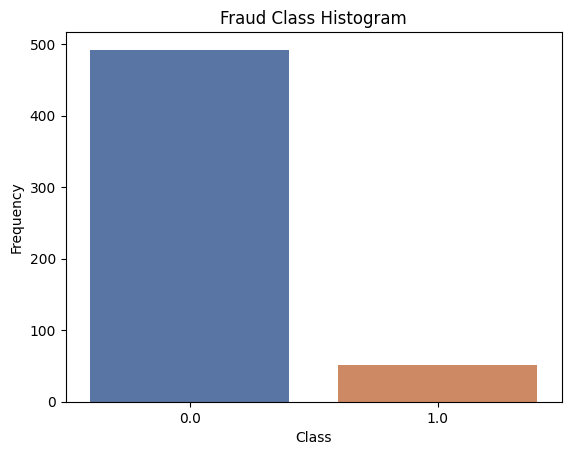

In [17]:
sns.countplot(x="Class", data=new_dataset, palette="deep")
plt.title("Fraud Class Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [18]:
new_dataset.shape

(544, 31)

In [19]:
new_dataset.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
2077,-0.321773,-1.033031,-2.399827,2.129750,0.376299,-0.867667,-1.095359,-0.912192,-0.188161,1.073359,...,0.345854,-0.209611,-0.481867,0.116611,0.490285,-0.019235,0.295788,0.564129,0.347282,0.0
7985,-0.265949,0.479524,1.288376,0.003808,0.430654,-0.074485,-0.107713,0.177579,-0.488912,-0.045432,...,0.037368,-0.079178,0.059559,-0.184909,-0.790284,0.370637,1.082568,-0.087219,-0.013981,0.0
10684,-0.294001,1.621677,-0.504333,0.286342,-0.145339,-2.682329,2.418805,3.250418,-0.015151,0.763360,...,-0.134064,-0.114341,0.014124,-0.302952,0.972811,0.228596,-0.843046,0.032217,0.134338,0.0
9171,-0.321829,0.819301,1.208676,0.105042,1.027841,0.226617,-0.747359,-0.655428,-0.416311,-0.118166,...,-0.045408,-0.269740,-0.537701,0.169499,0.529794,-0.042269,0.717325,-0.087008,0.002045,0.0
11254,-0.283341,1.857812,1.205542,-0.305216,1.164810,-0.430281,-1.358631,-0.975065,-0.684529,-0.103537,...,-0.195797,-0.141706,0.033417,0.014021,0.658810,0.409343,-0.744548,0.061384,0.032794,0.0


In [20]:
new_dataset["Class"].value_counts()

0.0    492
1.0     52
Name: Class, dtype: int64

In [21]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 2077 to 11880
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scaled_amount  544 non-null    float64
 1   scaled_time    544 non-null    float64
 2   V1             544 non-null    float64
 3   V2             544 non-null    float64
 4   V3             544 non-null    float64
 5   V4             544 non-null    float64
 6   V5             544 non-null    float64
 7   V6             544 non-null    float64
 8   V7             544 non-null    float64
 9   V8             544 non-null    float64
 10  V9             544 non-null    float64
 11  V10            544 non-null    float64
 12  V11            544 non-null    float64
 13  V12            544 non-null    float64
 14  V13            544 non-null    float64
 15  V14            544 non-null    float64
 16  V15            544 non-null    float64
 17  V16            544 non-null    float64
 18  V17  

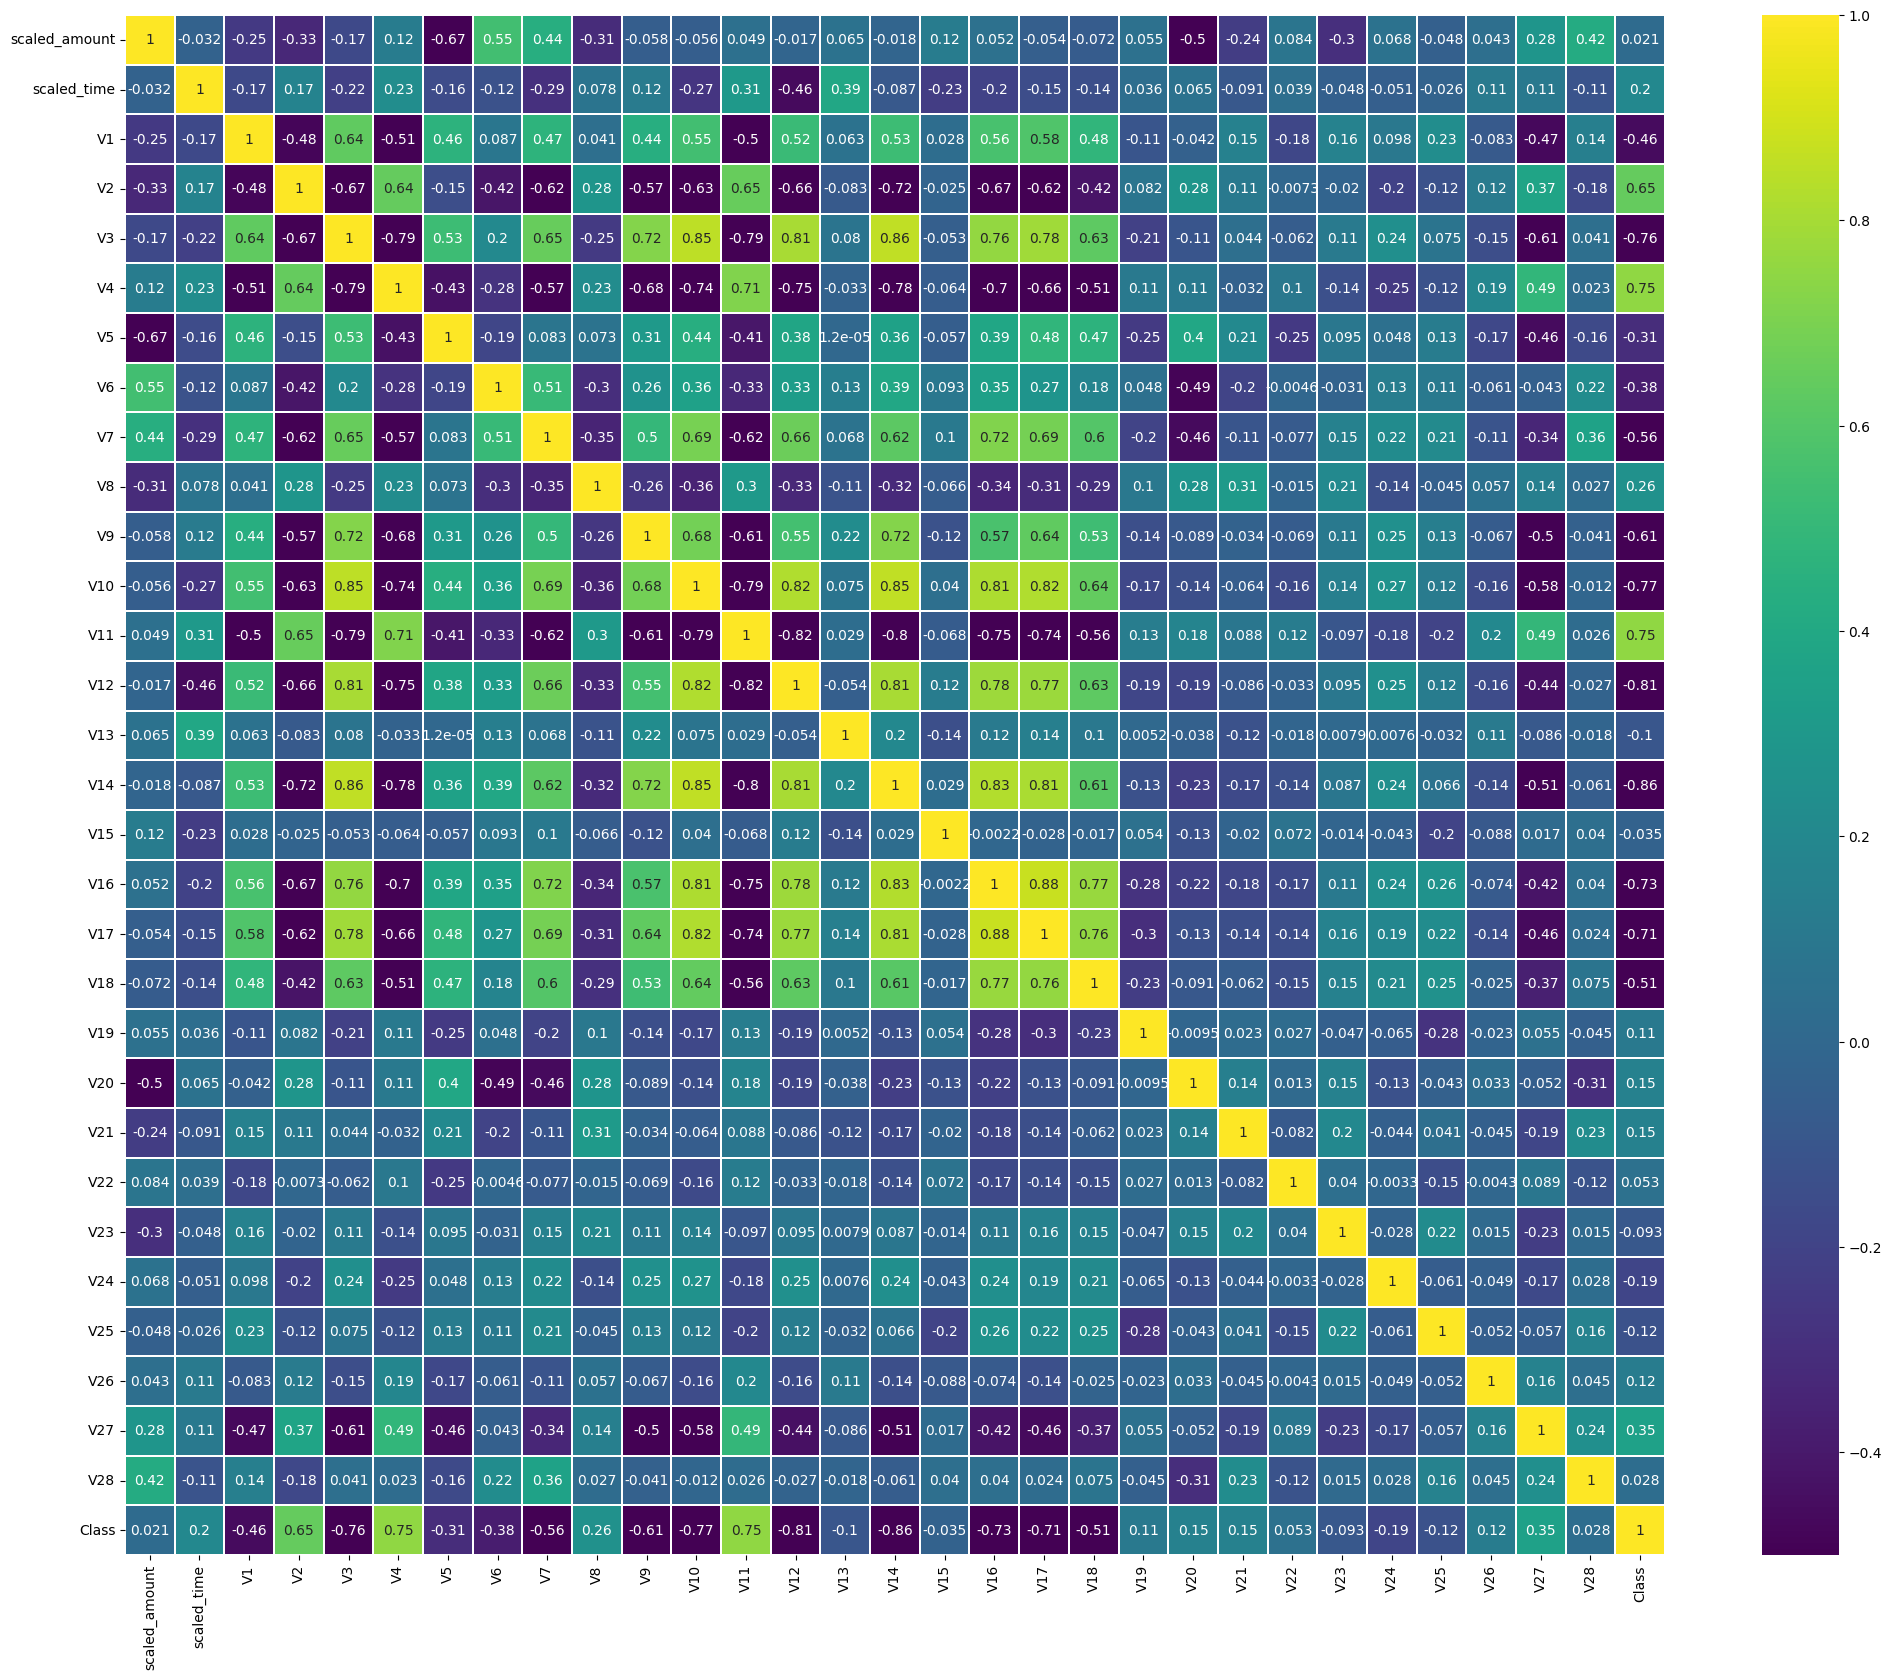

In [22]:
fig = plt.figure(figsize = (25, 20))
sns.heatmap(new_dataset.corr(), cmap='viridis', vmax = 1, vmin=-0.5 , square = True , linewidths= 0.05, annot=True)
plt.show()

In [23]:
X= new_dataset.drop(columns="Class",axis=1)
Y=new_dataset["Class"]

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [25]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [26]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred,Y_test)

Accuracy score :  0.9908256880733946
Model Precision: 0.91
Model Recall: 1.0
Model F1-Score: 0.95
Model ROC: 0.99 

              precision    recall  f1-score   support

       Valid       1.00      0.99      0.99        99
       Fraud       0.91      1.00      0.95        10

    accuracy                           0.99       109
   macro avg       0.95      0.99      0.97       109
weighted avg       0.99      0.99      0.99       109
 



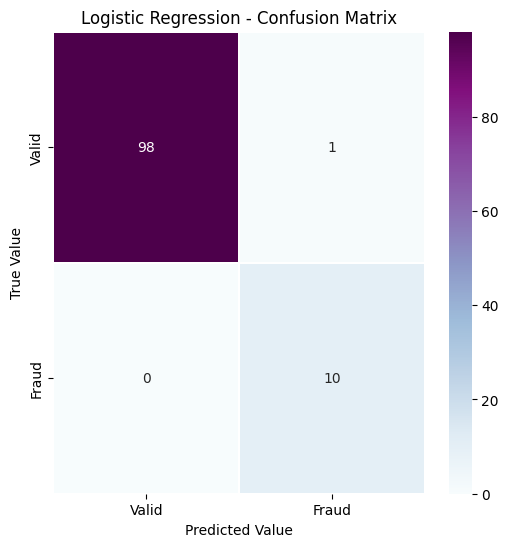

In [27]:
print('Accuracy score : ', accuracy)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Valid', 'Fraud']
plt.figure(figsize=(6, 6))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("Logistic Regression - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model1=rfc.fit(X_train,Y_train)
y_pred=model1.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9724770642201835

Model Precision: 0.89
Model Recall: 0.8
Model F1-Score: 0.84
Model ROC: 0.89 

              precision    recall  f1-score   support

       Valid       0.98      0.99      0.98        99
       Fraud       0.89      0.80      0.84        10

    accuracy                           0.97       109
   macro avg       0.93      0.89      0.91       109
weighted avg       0.97      0.97      0.97       109
 



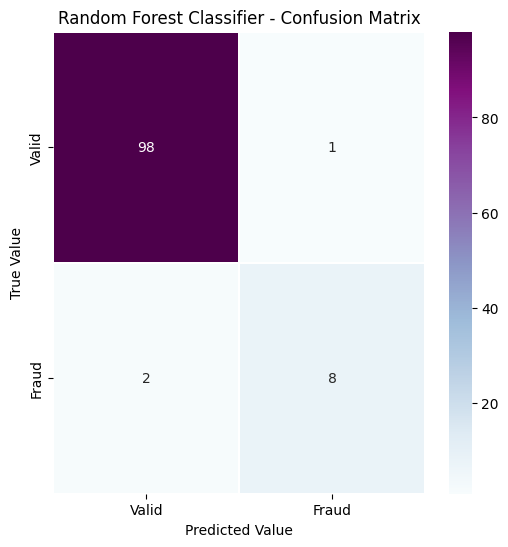

In [29]:
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Valid', 'Fraud']
plt.figure(figsize=(6, 6))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("Random Forest Classifier - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

Model Precision: 0.64
Model Recall: 0.9
Model F1-Score: 0.75
Model ROC: 0.92 

              precision    recall  f1-score   support

       Valid       0.99      0.95      0.97        99
       Fraud       0.64      0.90      0.75        10

    accuracy                           0.94       109
   macro avg       0.82      0.92      0.86       109
weighted avg       0.96      0.94      0.95       109
 



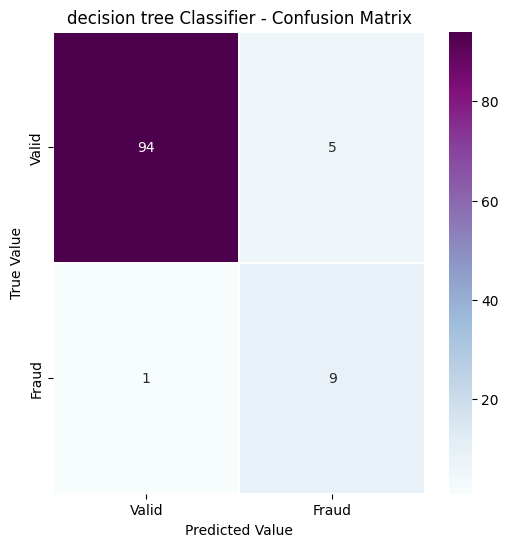

In [30]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
model3=dt.fit(X_train,Y_train)
y_pred=model3.predict(X_test)
accuracy_score(Y_test,y_pred)
print("Model Precision:", round(precision_score(Y_test, y_pred),2))
print("Model Recall:", round(recall_score(Y_test, y_pred),2))
print("Model F1-Score:", round(f1_score(Y_test, y_pred),2))
print("Model ROC:", round(roc_auc_score(Y_test, y_pred),2) , '\n')

conf_matrix=confusion_matrix(Y_test, y_pred)
labels= ['Valid', 'Fraud']
plt.figure(figsize=(6, 6))

sns.heatmap(pd.DataFrame(conf_matrix), xticklabels= labels, yticklabels= labels,
            linewidths= 0.05 ,annot=True, fmt="d" , cmap='BuPu')

print(classification_report(Y_test, y_pred, target_names=labels) , '\n')

plt.title("decision tree Classifier - Confusion Matrix")
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

In [31]:
import pickle
filename = "ccfdtrained_model.sav"
pickle.dump(model,open(filename,"wb"))

In [32]:
loaded_model = pickle.load(open('ccfdtrained_model.sav','rb'))